In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import accuracy_score

In [3]:
# Load dataset
data = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

# Preprocessing
data = data[['Age', 'Survived']].dropna()

data.head()

,Age,Survived
0,22.0,0
1,38.0,1
2,26.0,1
3,35.0,1
4,35.0,0


In [4]:
# create custom bins
age_bins = [0, 18, 60, 100]
age_labels = ['Child', 'Adult', 'Senior']

In [5]:
data['Age Group']=pd.cut(data['Age'],bins=age_bins,labels=age_labels,right=False)
data.sample(5)

,Age,Survived,Age Group
615,24.0,1,Adult
131,20.0,0,Adult
400,39.0,1,Adult
144,18.0,0,Adult
805,31.0,0,Adult


# Uniform Binning

In [6]:
# Load dataset
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

# Preprocessing
df = df[['Age', 'Survived']].dropna()

df.head()

,Age,Survived
0,22.0,0
1,38.0,1
2,26.0,1
3,35.0,1
4,35.0,0


In [7]:
X_train, X_test, y_train, y_test = train_test_split(df[['Age']], df['Survived'], test_size=0.2, random_state=42)

In [9]:
discretizer=KBinsDiscretizer(n_bins=5,encode='ordinal',strategy='uniform')
X_train_binned = pd.DataFrame(discretizer.fit_transform(X_train), columns=discretizer.get_feature_names_out())
X_test_binned = pd.DataFrame(discretizer.transform(X_test), columns=discretizer.get_feature_names_out())

X_train_binned.head()

,Age
0,1.0
1,1.0
2,1.0
3,2.0
4,1.0


In [10]:
discretizer.bin_edges_

array([array([ 0.42 , 16.336, 32.252, 48.168, 64.084, 80.   ])],
      dtype=object)

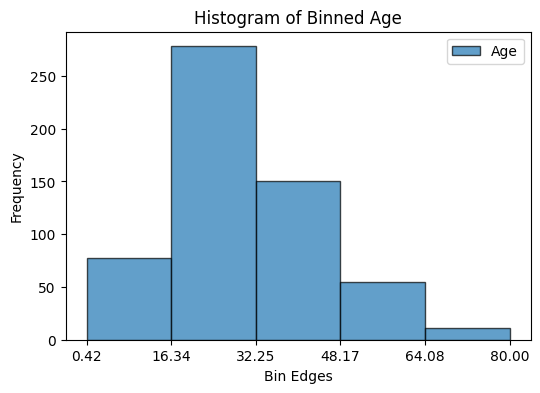

In [11]:
import matplotlib.pyplot as plt

# Extract the bin edges for the 'Age' feature from the nested array structure
age_bin_edges = discretizer.bin_edges_[0]

plt.figure(figsize=(6, 4))
# Use the extracted bin edges for plotting
plt.hist(X_train['Age'], bins=age_bin_edges, alpha=0.7, edgecolor='black', label='Age')
plt.title('Histogram of Binned Age')
plt.xlabel('Bin Edges')
plt.ylabel('Frequency')
plt.xticks(age_bin_edges)
plt.legend()
plt.show()

In [12]:
# A quick question
# Load dataset
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

# Preprocessing
df = df[['Age', 'Sex', 'Survived']]

df.head()

,Age,Sex,Survived
0,22.0,male,0
1,38.0,female,1
2,26.0,female,1
3,35.0,female,1
4,35.0,male,0


In [14]:
X_train, X_test, y_train, y_test = train_test_split(df[['Age', 'Sex']], df['Survived'], test_size=0.2, random_state=42)

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# Pipeline for processing the 'Age' column
age_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Impute missing values with the median
    ('binning', KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform'))  # Then bin the data
])

In [15]:
# ColumnTransformer for applying different transformations
preprocessor = ColumnTransformer(transformers=[
    ('age', age_pipeline, ['Age']),  # Apply age_pipeline to 'Age'
    ('sex', OneHotEncoder(), ['Sex'])  # Apply OneHotEncoder to 'Sex'
])

In [16]:
from sklearn.linear_model import LogisticRegression

full_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression())  # Use logistic regression as the model
])

In [17]:
full_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('age',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('binning',
                                                                   KBinsDiscretizer(encode='ordinal',
                                                                                    n_bins=3,
                                                                                    strategy='uniform'))]),
                                                  ['Age']),
                                                 ('sex', OneHotEncoder(),
                                                  ['Sex'])])),
                ('model', LogisticRegression())])

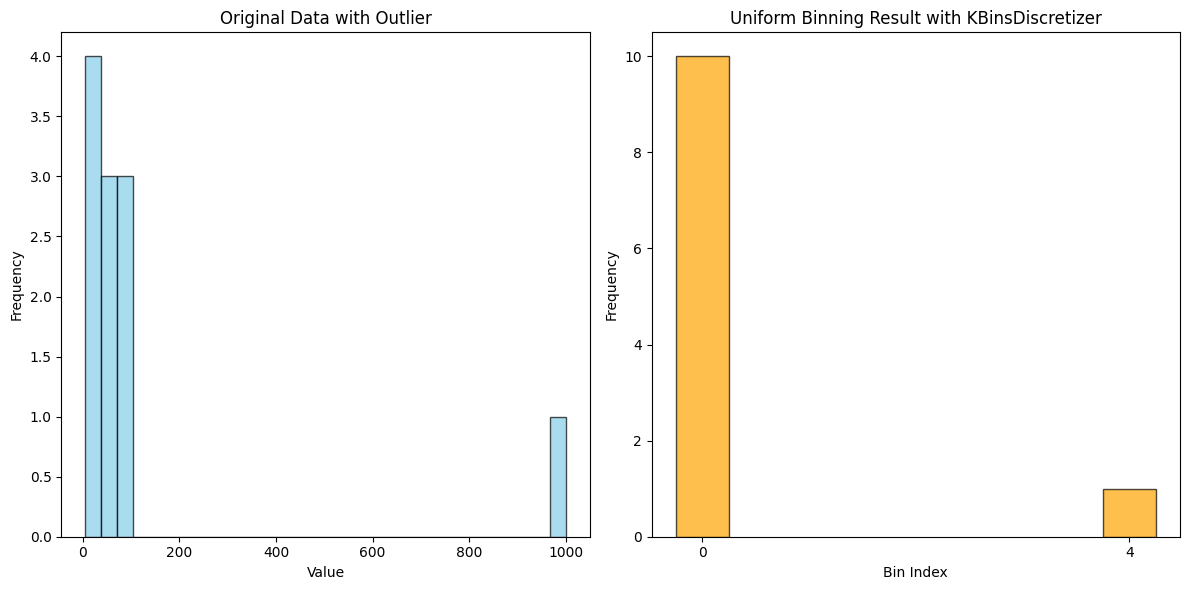

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer

# Generating a dataset with values mostly between 0 and 100, with one outlier at 1000
data = np.array([5, 15, 25, 35, 45, 55, 65, 75, 85, 95, 1000])

# Reshape data for KBinsDiscretizer
data_reshaped = data.reshape(-1, 1)  # Convert to 2D array for KBinsDiscretizer

# Define the number of bins
n_bins = 5

# Initialize KBinsDiscretizer
discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')

# Fit and transform the data
data_binned = discretizer.fit_transform(data_reshaped).ravel()  # Flatten back to 1D array for plotting

# Plotting the original data and the binned result
plt.figure(figsize=(12, 6))

# Plotting the original data
plt.subplot(1, 2, 1)
plt.hist(data, bins=30, color='skyblue', alpha=0.7, edgecolor='black')
plt.title('Original Data with Outlier')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Plotting the histogram after uniform binning with KBinsDiscretizer
plt.subplot(1, 2, 2)
# Calculate the counts for each bin for plotting
unique_bins = np.unique(data_binned)
bin_counts = [np.sum(data_binned == b) for b in unique_bins]
plt.bar(unique_bins, bin_counts, width=0.5, color='orange', alpha=0.7, edgecolor='black', align='center')
plt.title('Uniform Binning Result with KBinsDiscretizer')
plt.xlabel('Bin Index')
plt.ylabel('Frequency')
plt.xticks(unique_bins)  # Ensure x-ticks correspond to bin indices

plt.tight_layout()
plt.show()


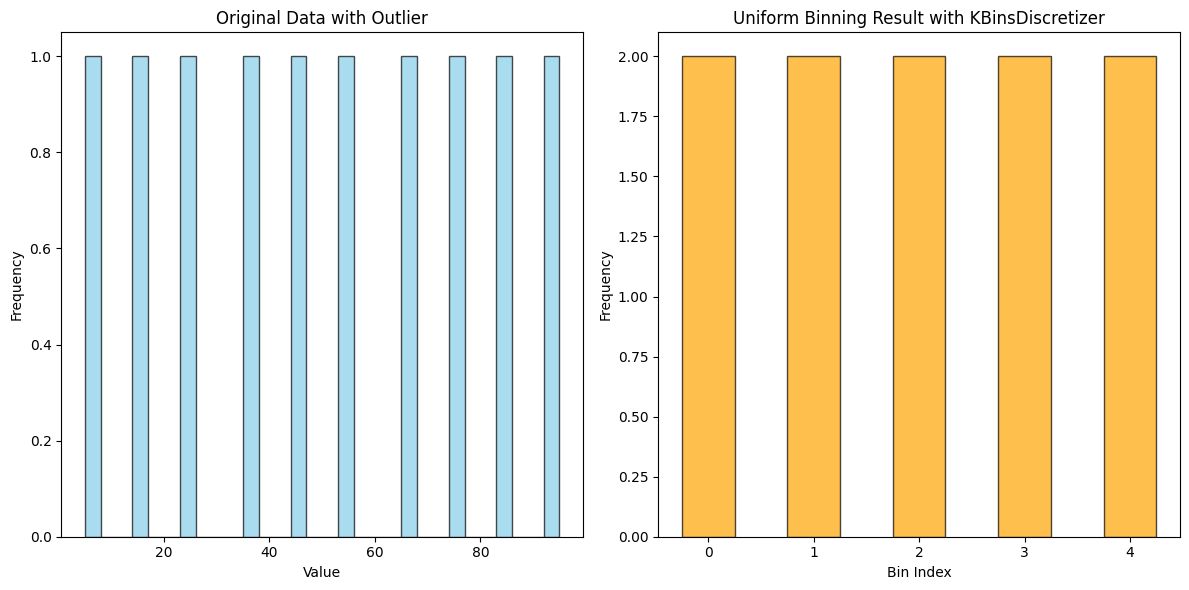

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer

# Generating a dataset with values mostly between 0 and 100, with one outlier at 1000
data = np.array([5, 15, 25, 35, 45, 55, 65, 75, 85, 95])

# Reshape data for KBinsDiscretizer
data_reshaped = data.reshape(-1, 1)  # Convert to 2D array for KBinsDiscretizer

# Define the number of bins
n_bins = 5

# Initialize KBinsDiscretizer
discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')

# Fit and transform the data
data_binned = discretizer.fit_transform(data_reshaped).ravel()  # Flatten back to 1D array for plotting

# Plotting the original data and the binned result
plt.figure(figsize=(12, 6))

# Plotting the original data
plt.subplot(1, 2, 1)
plt.hist(data, bins=30, color='skyblue', alpha=0.7, edgecolor='black')
plt.title('Original Data with Outlier')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Plotting the histogram after uniform binning with KBinsDiscretizer
plt.subplot(1, 2, 2)
# Calculate the counts for each bin for plotting
unique_bins = np.unique(data_binned)
bin_counts = [np.sum(data_binned == b) for b in unique_bins]
plt.bar(unique_bins, bin_counts, width=0.5, color='orange', alpha=0.7, edgecolor='black', align='center')
plt.title('Uniform Binning Result with KBinsDiscretizer')
plt.xlabel('Bin Index')
plt.ylabel('Frequency')
plt.xticks(unique_bins)  # Ensure x-ticks correspond to bin indices

plt.tight_layout()
plt.show()


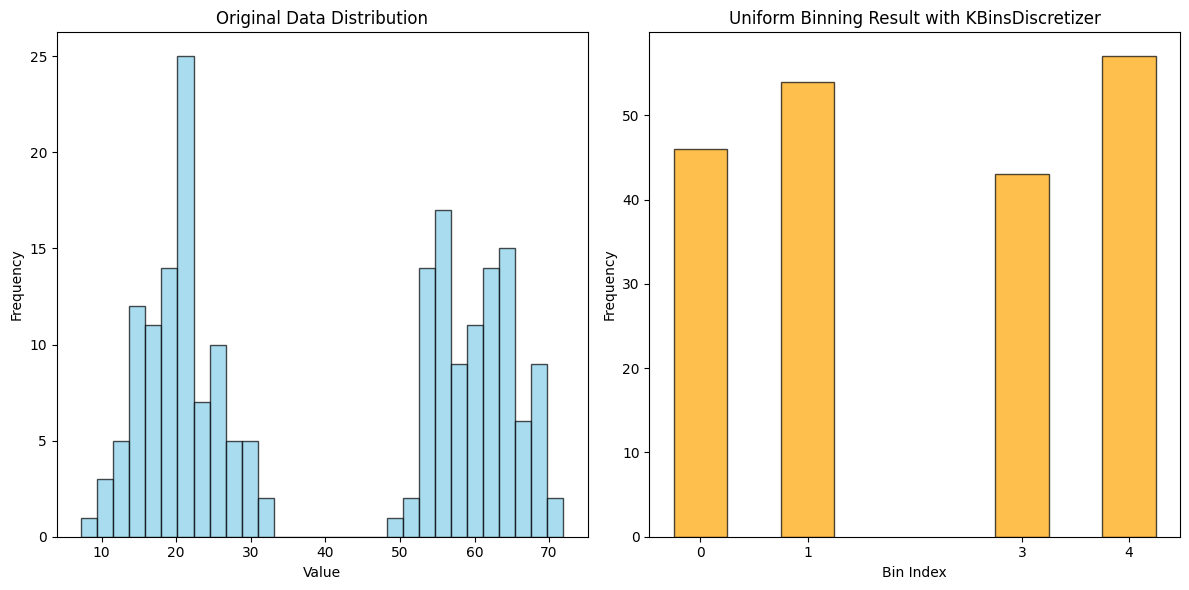

In [20]:
# problem 2 - not adaptive

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer

# Seed for reproducibility
np.random.seed(0)

# Generating two clusters of data
data_cluster_1 = np.random.normal(loc=20, scale=5, size=100)  # Cluster 1 centered around 20
data_cluster_2 = np.random.normal(loc=60, scale=5, size=100)  # Cluster 2 centered around 60

# Combining the two clusters into a single dataset
data = np.concatenate([data_cluster_1, data_cluster_2])

# Reshape data for KBinsDiscretizer
data_reshaped = data.reshape(-1, 1)  # Convert to 2D array for KBinsDiscretizer

# Initialize KBinsDiscretizer for uniform binning
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')

# Fit and transform the data
data_binned = discretizer.fit_transform(data_reshaped).ravel()  # Flatten back to 1D array for plotting

# Plotting the original data distribution and the binned result
plt.figure(figsize=(12, 6))

# Plotting the original data distribution
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.hist(data, bins=30, color='skyblue', alpha=0.7, edgecolor='black')
plt.title('Original Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Plotting the histogram after uniform binning with KBinsDiscretizer
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
# For each unique bin, count the occurrences and plot
unique_bins = np.unique(data_binned)
bin_counts = [np.sum(data_binned == b) for b in unique_bins]
plt.bar(unique_bins, bin_counts, width=0.5, color='orange', alpha=0.7, edgecolor='black', align='center')
plt.title('Uniform Binning Result with KBinsDiscretizer')
plt.xlabel('Bin Index')
plt.ylabel('Frequency')
plt.xticks(unique_bins)  # Ensure x-ticks correspond to bin indices

plt.tight_layout()
plt.show()


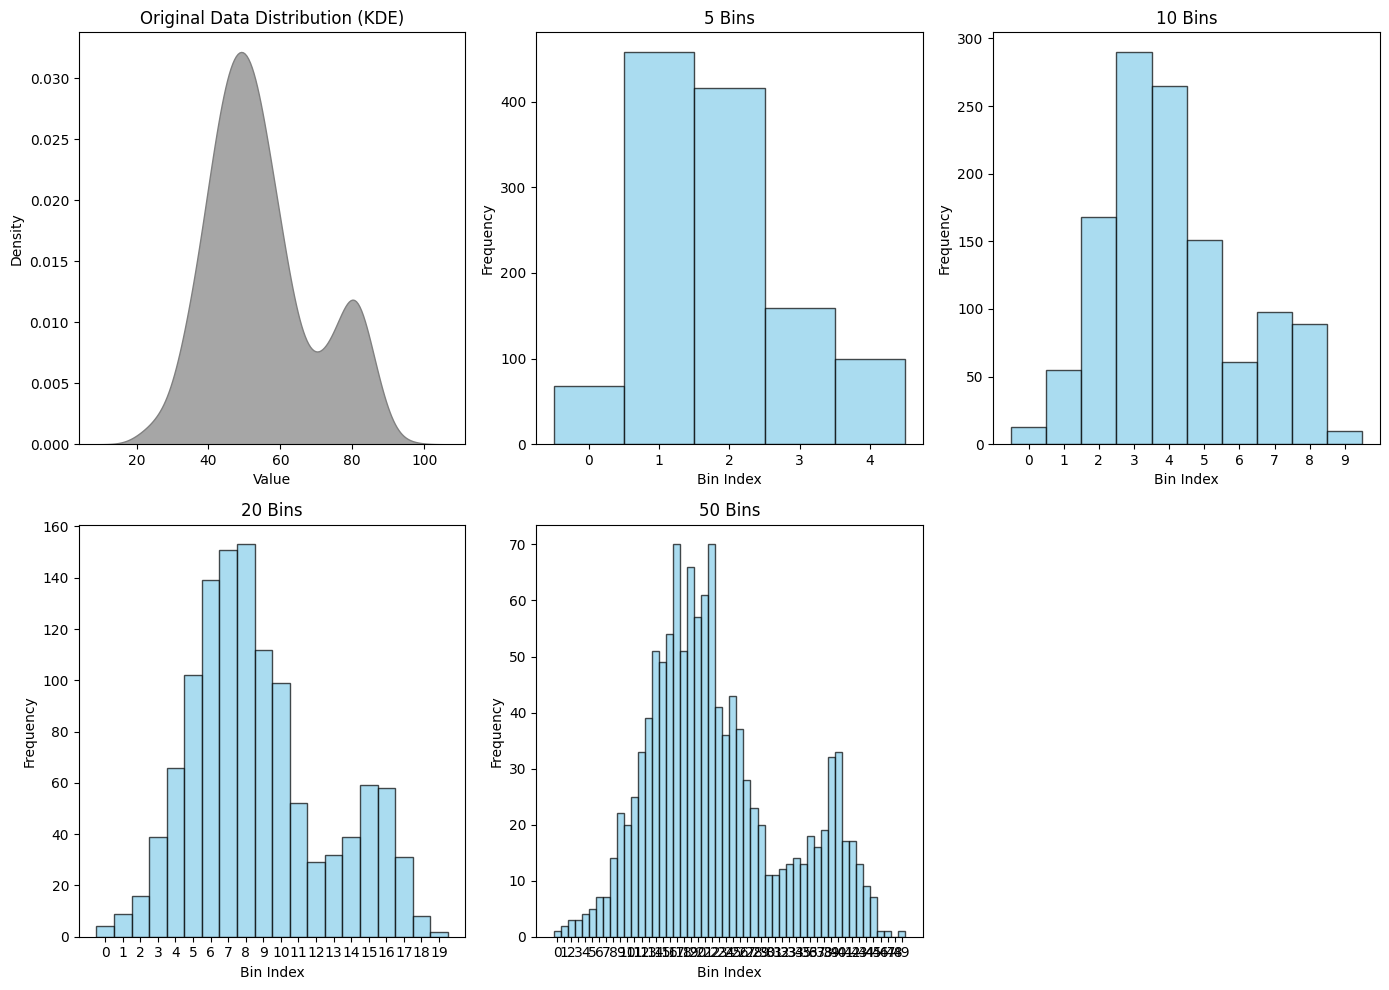

In [21]:
# Problem #3 - Seelcting # of bins

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import KBinsDiscretizer

# Seed for reproducibility
np.random.seed(0)

# Generate a normally distributed dataset with an additional cluster
data_normal = np.random.normal(loc=50, scale=10, size=1000)
data_cluster = np.random.normal(loc=80, scale=5, size=200)
data = np.concatenate([data_normal, data_cluster]).reshape(-1, 1)  # Reshape for KBinsDiscretizer

# Different choices for the number of bins
bin_choices = [5, 10, 20, 50]

plt.figure(figsize=(14, 10))

# Plot the original data distribution using KDE
plt.subplot(2, 3, 1)
sns.kdeplot(data[:, 0], fill=True, color='gray', alpha=0.7)
plt.title('Original Data Distribution (KDE)')
plt.xlabel('Value')
plt.ylabel('Density')

# Apply KBinsDiscretizer and plot histograms for each bin choice
for i, n_bins in enumerate(bin_choices, start=2):
    # Initialize and fit the KBinsDiscretizer
    discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
    data_binned = discretizer.fit_transform(data)

    # Plot histogram of the binned data
    plt.subplot(2, 3, i)
    # We plot the binned data by the bin indices and need to calculate the bin width for plotting
    bin_edges = discretizer.bin_edges_[0]
    plt.hist(data_binned, bins=np.arange(len(bin_edges)), align='left', color='skyblue', alpha=0.7, edgecolor='black')
    plt.title(f'{n_bins} Bins')
    plt.xlabel('Bin Index')
    plt.ylabel('Frequency')
    plt.xticks(np.arange(len(bin_edges) - 1))

plt.tight_layout()
plt.show()
